# Summary 
---

# House Price Prediction with Regression

####  This dataset was collected from kaggle and is collection of 79 explanatory variables (features) describing (almost) every aspect of residential homes in Ames, Iowa. It has consists of 2919 records (rows) and 81 features(columns).

#### Our objective is to perform Data Wrangling, Data Cleaning , Exploratory Data Analysis, Outlier Detection and Treatment and Feature Selection ".
#### We also have an additional objective for performing "Hypothesis Testing" as required by the course and hence we will be performing the same and showing some examples and also where it can be used related to our data analysis process(Binning).

---

# Data Wrangling

In [1]:
# Load Necessary Libraries

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.stats.weightstats as sm

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
df = pd.read_csv('KaggleHousePrices_train.csv')
print(df.shape)

(1460, 81)


#### We observe the dataset provided to us is already splitted into two sets - train and test set. So we can load our train dataset and perform Explortory Data Analysis on it and leave the training set untouched. It is very important to not perform EDA and make inferences on test set as it will lead to data leakage. 

#### Our training dataset has 1460 rows and 81 columns.

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Info about dataset from kaggle

#### Here's a brief version of what the features represent:-

    SalePrice - the property's sale price in dollars. This is the target variable that you're 
                trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [4]:
df.Id.duplicated().sum()

0

#### No duplicated/rows copied twice by mistake found using 'name' feature

In [5]:
dropped_col = []

#### Creating a list variable named dropped column that will store the names of columns being dropped from training set and we will update it everytime we drop a column. It will be later used when dropping columns for test set.

In [6]:
dropped_col.append('Id')
df.drop(columns = ['Id'], inplace = True)
df.shape

(1460, 80)

#### Dropping 'Id' feature as it contains no information relevant to our analysis.

---

# Outliers Detection & Treatment 

In [7]:
# Checking data types

df.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

#### We observe that we have both numeric as well as object data types

In [8]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### We observe some outliers as there is  discrepancy between median value and min-max value for some of the feautures. Thus, we will have to analyze our data more to get a better idea about them.

#### Note: We will deal with missing values afterwards since imputation technique can get affected unnecessarily by these kind of outliers(faulty data / data not )

# Exploratory Data Analysis

---

In [9]:
numeric_features = list(set(df.select_dtypes(['int64','float64'])))
                        
print(numeric_features)

['YrSold', 'PoolArea', '1stFlrSF', 'BsmtFullBath', 'SalePrice', '2ndFlrSF', 'OverallQual', 'MoSold', 'YearBuilt', 'LowQualFinSF', 'BsmtFinSF1', 'GarageArea', 'OpenPorchSF', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', 'OverallCond', 'MiscVal', 'MSSubClass', 'KitchenAbvGr', 'HalfBath', 'BsmtFinSF2', 'TotRmsAbvGrd', 'FullBath', 'BsmtHalfBath', 'ScreenPorch', 'YearRemodAdd', 'LotFrontage', 'GarageYrBlt', '3SsnPorch', 'Fireplaces', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'BedroomAbvGr', 'TotalBsmtSF', 'GrLivArea']


#### Selecting out numeric_features which might require outliers treatment.

## Boxenplots

#### As out dataset is not small and we have outliers, we will use boxenplots instead of boxplots to get a better understanding of our distribution and our outliers

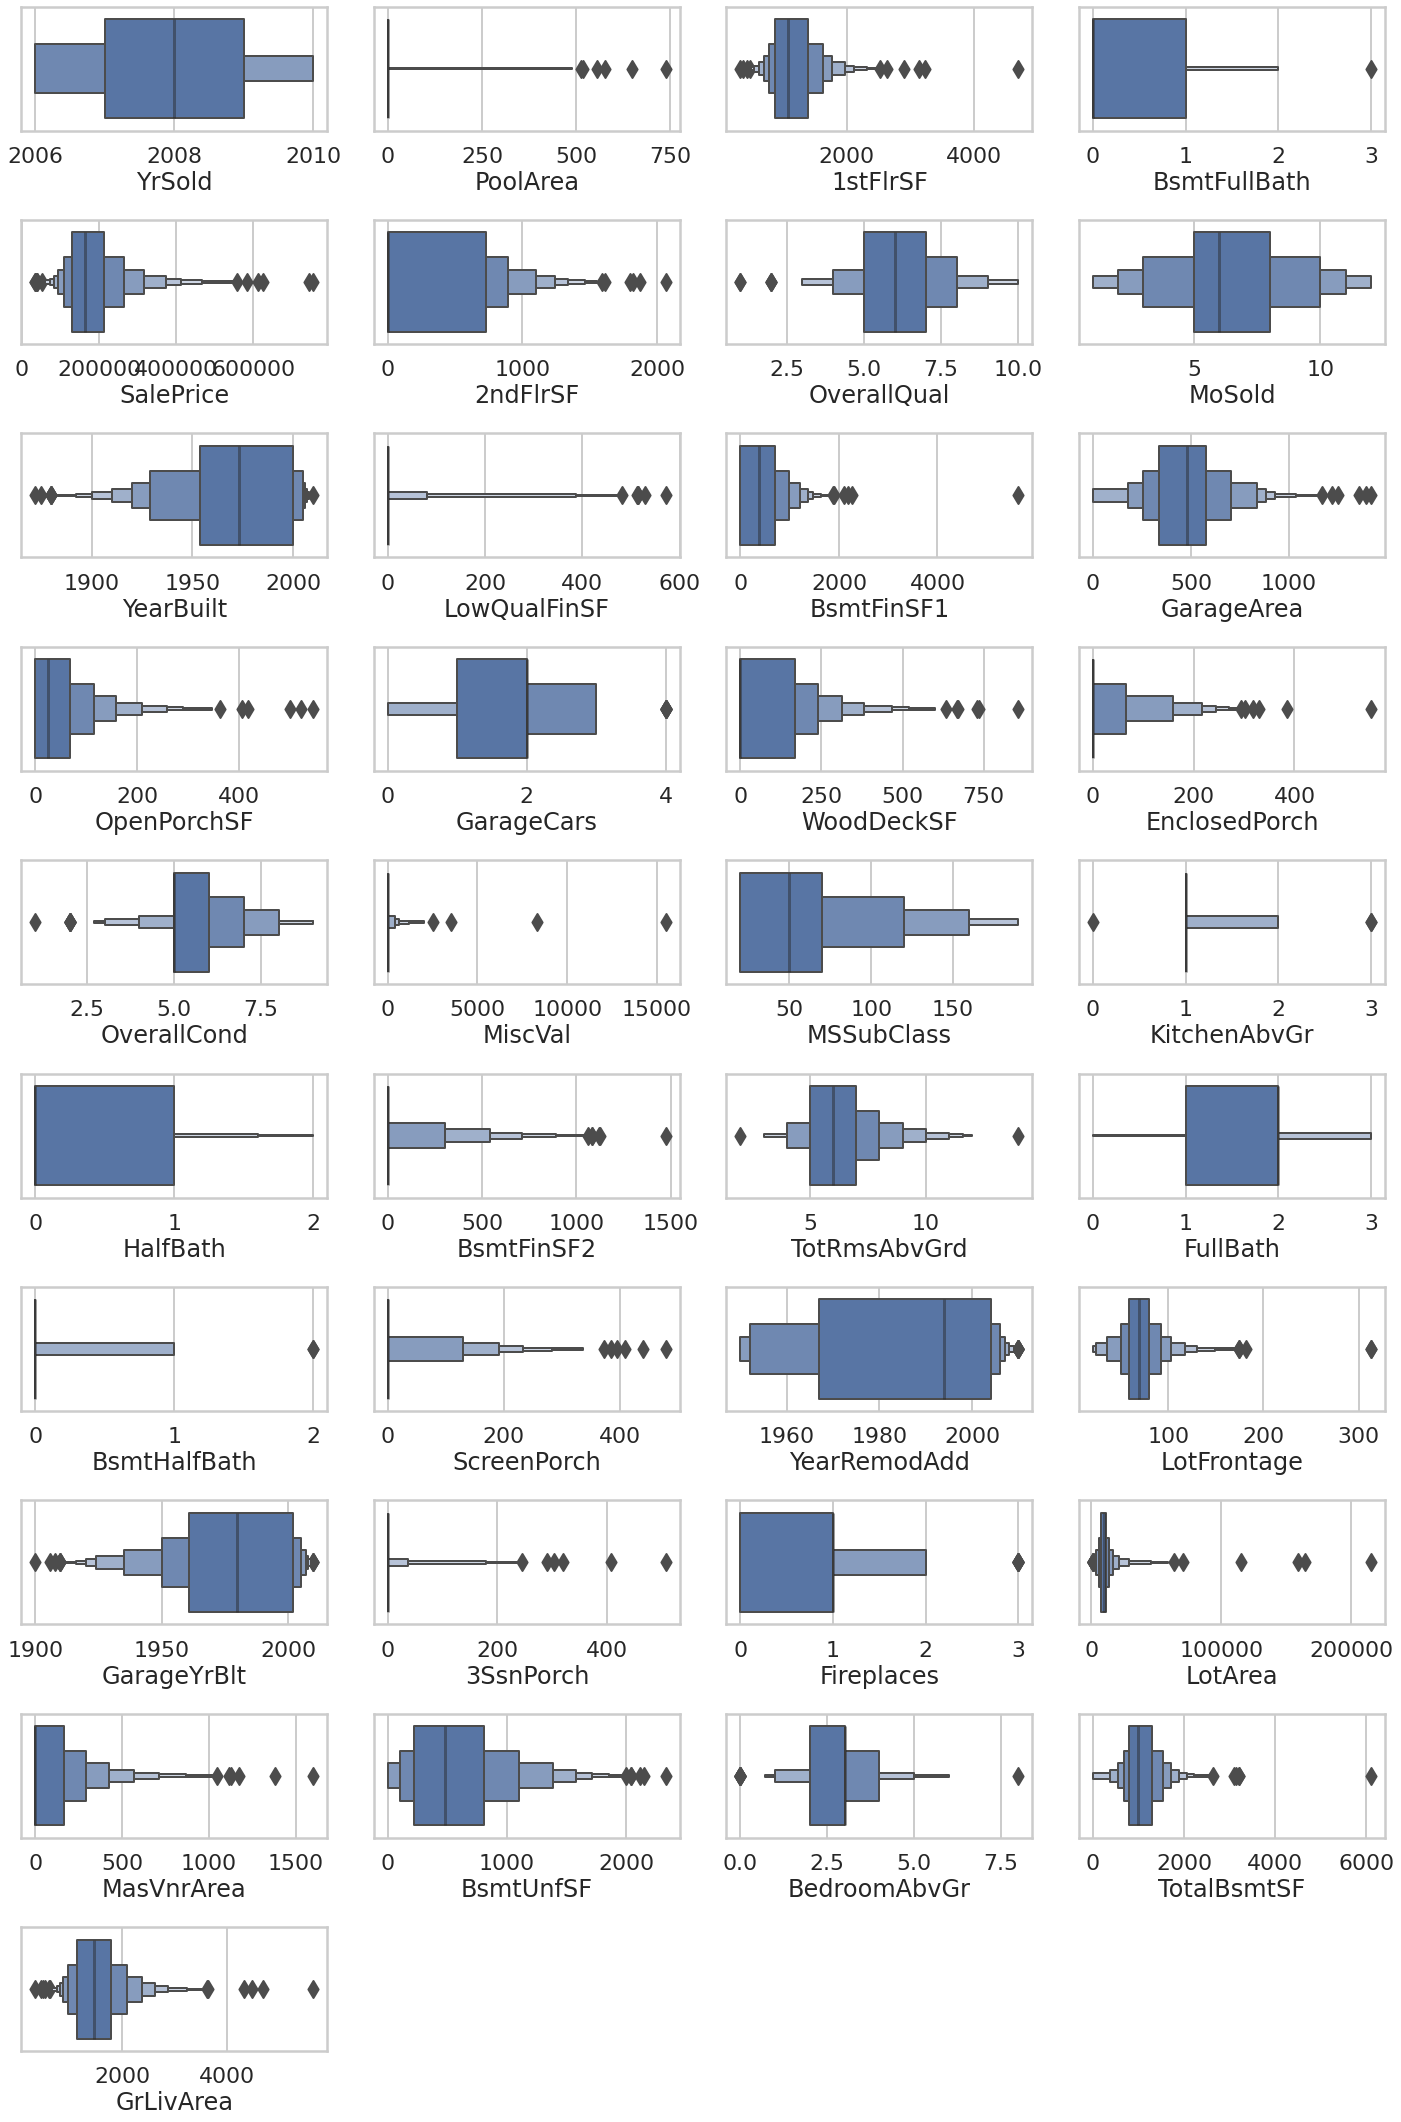

In [10]:
sns.set_theme(context = 'poster', style = 'whitegrid')
          
def boxenplots_eda(df):
    fig, ax = plt.subplots(10, 4, figsize=(20, 30))
    ax = ax.flatten()
    ax[-1].set_axis_off()
    ax[-2].set_axis_off()
    ax[-3].set_axis_off()
        
    for ax,feature in zip(ax,numeric_features):
        ax = sns.boxenplot(ax = ax, x = feature, data = df)
        plt.tight_layout()
                
boxenplots_eda(df)

#### We observe some moderate outliers in some features and some extreme outliers. We would like to further see their influence on other features.

## Histogram

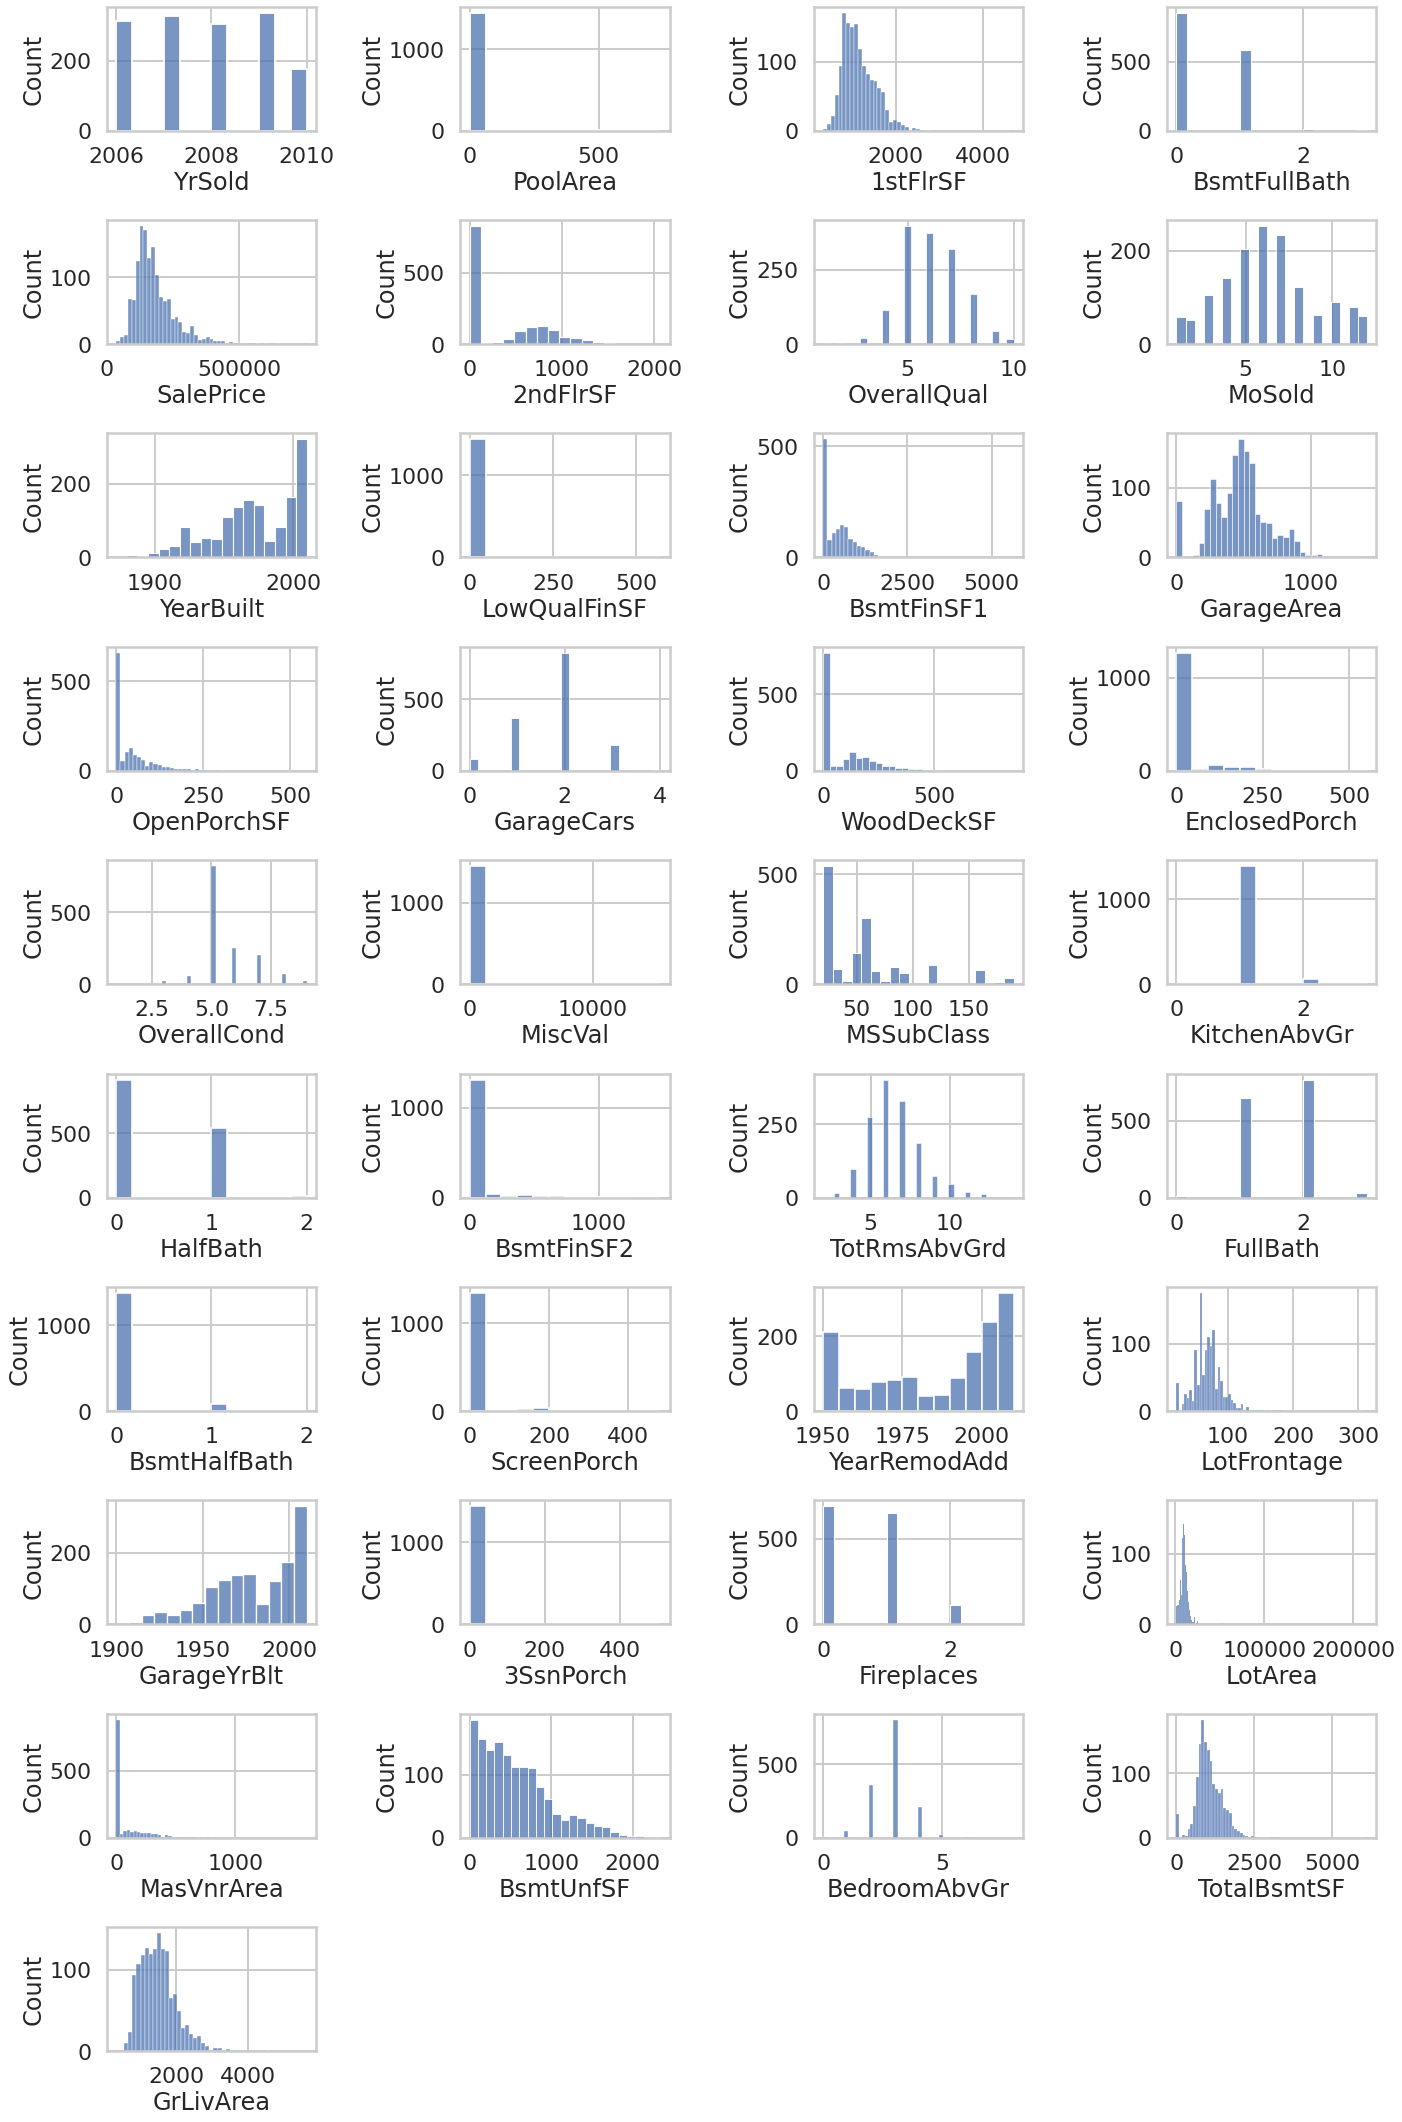

In [11]:
def histogram_eda(df):
    fig, ax = plt.subplots(10, 4, figsize=(20, 30))
    ax = ax.flatten()
    ax[-1].set_axis_off()
    ax[-2].set_axis_off()
    ax[-3].set_axis_off()
        
    for ax,feature in zip(ax,numeric_features):
        ax = sns.histplot(ax = ax, x = feature, data = df)
        plt.tight_layout()
                
histogram_eda(df)

#### We observe most of the features in our data are heavily skewed and the outliers look plausible and are not faulty. We will try to use a transformation technique to fix them.

#### Feature 'LotArea' and 'TotalBsmtSF' seem to have extreme outliers. We will plot a histogram for them again to see them in more detail. They might be correlated to the outliers in the other features as well.

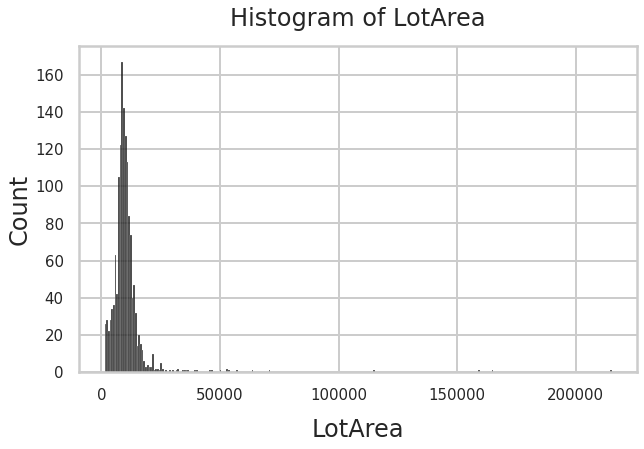

In [12]:
# Histogram for LotArea

plt.figure(figsize = (10,6))
ax = sns.histplot(df['LotArea'], bins = 300, color = 'Black')
ax.set_title("Histogram of LotArea", pad = 20)
ax.xaxis.labelpad = 15
ax.xaxis.set_tick_params(labelsize = 15)
ax.yaxis.set_tick_params(labelsize = 15)
plt.show()

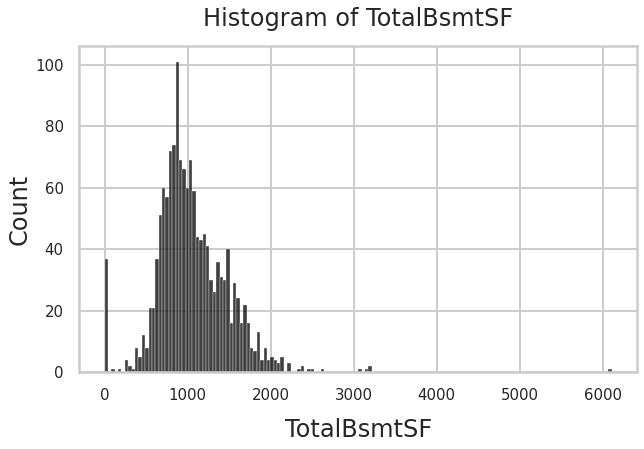

In [13]:
# Histogram for TotalBsmtSF

plt.figure(figsize = (10,6))
ax = sns.histplot(df['TotalBsmtSF'], bins = 150, color = 'Black')
ax.set_title("Histogram of TotalBsmtSF", pad = 20)
ax.xaxis.labelpad = 15
ax.xaxis.set_tick_params(labelsize = 15)
ax.yaxis.set_tick_params(labelsize = 15)
plt.show()

#### We infer that in the feature 'LotArea' we will set an upper threshold of 100000 to remove any extreme effect of outliers on the prediction of prices of houses in general range.
#### Also in feature 'TotalBsmtSF' except for the house with the highest total square footage(isolate value), others look plausible.

In [14]:
# Setting an upper limit of 100000 for lot area

df = df[(df["LotArea"] < 100000)]

print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 1456


In [15]:
# Removing value with highest basement square footage 

df.drop(df["TotalBsmtSF"].idxmax(), inplace = True)

# Missing Values

In [16]:
df.isnull().sum().sum()

6945

#### We observe we have lot of missing/null values in our data set
#### We will look into missing values in more detail now

In [17]:
# Calcualting missing values and their percent missing by features
                                           
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = pd.DataFrame(data = df.isnull().sum().sort_values(ascending=False), columns=['Missing_Values'])

missing_values['Percent'] = missing_values.Missing_Values.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100)) 
missing_values = missing_values[missing_values.Missing_Values > 0]
missing_values

,Missing_Values,Percent
PoolQC,1449,99.59
MiscFeature,1403,96.43
Alley,1364,93.75
Fence,1174,80.69
FireplaceQu,690,47.42
LotFrontage,256,17.59
GarageType,81,5.57
GarageCond,81,5.57
GarageFinish,81,5.57
GarageQual,81,5.57


#### We'll remove the features with a high percent of missing values such as PoolQC, MiscFeature, Alley, Fence, and FireplaceQu. 

#### Note that the feature 'LotFrontage' has only 16% missing. This is relatively low so we will not remove it.

In [18]:
dropped_col.extend(['Fence', 'MiscFeature', 'PoolQC','FireplaceQu','Alley'])

df.drop(['Fence', 'MiscFeature', 'PoolQC','FireplaceQu','Alley'], axis=1, inplace = True)
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

#### We have dropped columns with high missing values

#### The remaining features with missing values we will replace with multiple imputation technique. 

#### Note: Now before doing 'Multiple Imputation' we should decide what kind of imputation technique will we be performing. In case of 'knn imputation' we will have to normalize our features before performing imputation as it uses distance based metric. Here, we will be using 'Iterative imputation', so we dont have to do it and also it will be more useful to check for skewness and make the data more normal if required/appropriate after imputation.
#### Also, we will have to encode our object data types to numeric type before we can perform imputation. So, now we can first check our object data types.

In [19]:
# Checking our object data types

df.select_dtypes('object').describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,...,1454,1455,1455,1374,1374,1374,1374,1455,1455,1455
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1146,1450,925,1311,1454,1051,1381,225,1256,1440,...,1329,733,1355,865,604,1306,1321,1335,1263,1194


#### We observe we have lot of object data types and some have a lot of unique values as well. When performing one-hot encoding, our number of features for categorical varibales increases exponentially. Hence, we should perform binning as well as reduction of some features if possible. 

#### Hypothesis testing can help us in deciding the same. We can select couple of features to demonstrate the same.

In [20]:
# Checking feature 'CentralAir'

print(df["CentralAir"].value_counts()) 

Y    1360
N      95
Name: CentralAir, dtype: int64


In [21]:
pd.pivot_table(df, values = ["SalePrice","LotArea"], columns = ['CentralAir'], aggfunc = np.mean).T

,LotArea,SalePrice
CentralAir,,
N,8635.010526,105264.073684
Y,10159.045588,185883.756618


In [22]:
# Checking feature 'Neighborhood'

# calcualting total counts by neighborhood
neighbor_count = pd.DataFrame(df["Neighborhood"].value_counts().sort_index()).reset_index()
neighbor_count.rename(columns = {"index": "Neighbor", "Neighborhood" : "Neighbor_count"}, inplace = True)

# calcualting sales price by neighborhood
neighbor_price = pd.pivot_table(df, values = "SalePrice", columns = 'Neighborhood', aggfunc = np.mean).T

In [23]:
# Merging the 2 neighbourhood dataframes

neighbor_df = neighbor_count.merge(neighbor_price, left_on='Neighbor', right_on='Neighborhood')

neighbor_df.sort_values(by = "SalePrice")

,Neighbor,Neighbor_count,SalePrice
10,MeadowV,17,98576.470588
9,IDOTRR,37,100123.783784
2,BrDale,16,104493.750000
3,BrkSide,58,124834.051724
7,Edwards,99,127898.686869
17,OldTown,113,128225.300885
19,Sawyer,74,136793.135135
1,Blueste,2,137500.000000
18,SWISU,25,142591.360000
13,NPkVill,9,142694.444444


In [24]:
# Checking feature 'BldgType'

print(df["BldgType"].value_counts()) 

1Fam      1216
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      30
Name: BldgType, dtype: int64


# Hypothesis Testing

#### For conducting 'Parametric Tests', we need to make sure our outcome variable follows normal distribution for "z" test or near normal distribution for 't-test'/'welch-test' or 'f-test'/'wald-test' when Central Limit Theorem is not applicable (number of samples is small). 

#### Note: Parametric tests are more powerful than non-parametric tests but the assumptions for them must be satisified first.

#### Here will be performing 3 hypothesis tests and checking what test (Parametirc or Non-Parametric) can be applied to them - 

#### * The mean sale price is of a house with central air conditioning system is more (One-sided Test)
#### * The mean sale price is the same for some of the designated neighbourhood 'MeadowV' and 'Blmngtn' and 'StoneBr' and 'SWISU' (Two-Sided Test)
#### * The mean sale price is the same across some types of building - Duplex, Townhouse and 2 room family condo. (Barlett/Levene test first to test assumption of equal variances and then ANOVA or Kruskal-Wallis test)

#### Our significance level for all the 3 hypothesis tests would be  0.05.

### First Test :-

#### Our first test is to see if the sales price of a house is effected if it is centrally air conditioned or not.
#### Our null hypothesis would be that the mean sale price of a house is higher for those that are air conditioned centrally and the alternative hypothesis would be that they are equal or lesser.

In [25]:
# Checking our value counts in the feature "CentralAir"

print(df["CentralAir"].value_counts()) 

Y    1360
N      95
Name: CentralAir, dtype: int64


#### We notice our sample is heavily unbalanced. 

#### We can either perform Welch test or Dunnett test (T3/C)  or we can take a sample from higher value count of equal length and perform a 'z' test. As number of observations in the sample is high (>30), by Central Limit Theorem we can apply 'z' test.

#### Note: In unequal sample sizes, Power is based on the smallest sample size, so power for our test will be based on the smaller sample although it wont generate any bias.

In [26]:
ctrl_air_0 = df[["SalePrice"]].loc[df["CentralAir"] == 'N']

In [27]:
ctrl_air_1 = df[["SalePrice"]].loc[df["CentralAir"] == 'Y']
ctrl_air_1 = ctrl_air_1.sample(n = 95, random_state = 5)

In [28]:
# both sample are of equal size

len(ctrl_air_0) == len(ctrl_air_1)

True

#### Here we will perform a one sided z-test for the 2 samples of equal length 

In [29]:
z_test_result = sm.ztest(ctrl_air_0 , ctrl_air_1, alternative = 'smaller')
pd.DataFrame(z_test_result, index = ["statistic","p-value"])

,0
statistic,-8.686274e+00
p-value,1.872607e-18


#### We observe the test statistic value is negative and also the p-value is very low. Hence we reject the null hypothesis and have enough evidence to support our alternative hypothesis . Thus, we conclude we  have enough evidence to say that the sales price of a house does increase if the house is air conditioned centrally.
#### Hence, statistically it informs us that this feature is important and it coincides with our real world thoughts and application as well 

---
### Second Test :-

#### Our second test's null hypothesis would be that mean sale price is same for the neighbourhood a) - 'MeadowV' & 'Blmngtn' and b) 'StoneBr' & 'SWISU' and the alternative would be they are different

#### Here our sample sizes are small and equal. Hence we will first check for normality of 'Sales Price' across Neighbourhood for Group A (MeadowV'and 'Blmngtn') and Group B ('StoneBr' and SWISU)

In [30]:
neigh_a_0 = df[["SalePrice"]].loc[df["Neighborhood"] == 'MeadowV']

In [31]:
neigh_a_1 = df[["SalePrice"]].loc[df["Neighborhood"] == 'Blmngtn']

In [32]:
neigh_b_0 = df[["SalePrice"]].loc[df["Neighborhood"] == 'StoneBr']

In [33]:
neigh_b_1 = df[["SalePrice"]].loc[df["Neighborhood"] == 'SWISU']

In [34]:
skew_limit = 0.5

skew_vals = abs(neigh_a_0["SalePrice"].skew()) > skew_limit
print(f"SalePrice of MeadowV is skewed : {skew_vals}")
skew_vals = abs(neigh_a_1["SalePrice"].skew()) > skew_limit
print(f"SalePrice of Blmngtn is skewed : {skew_vals}")
skew_vals = abs(neigh_b_0["SalePrice"].skew()) > skew_limit
print(f"SalePrice of StoneBr is skewed : {skew_vals}")
skew_vals = abs(neigh_b_1["SalePrice"].skew()) > skew_limit
print(f"SalePrice of SWISU is skewed : {skew_vals}")

SalePrice of MeadowV is skewed : True
SalePrice of Blmngtn is skewed : True
SalePrice of StoneBr is skewed : True
SalePrice of SWISU is skewed : False


#### Here as sample sizes are small, we cannot perform 'z' test. So, we checked if the data follows normal distribution by setting skew limit to 0.5 (Slightly Conservative Limit).

#### As our data doesn't follow normal distribution we will perform a two tailed non-parametric Mann Whitney U test(a.k.a. Mann Whitney Wilcoxon Test or the Wilcoxon Rank Sum Test)

In [35]:
mannwhitneyu_test_result = stats.mannwhitneyu(neigh_a_0, neigh_a_1)
pd.DataFrame(mannwhitneyu_test_result, index = ["statistic","p-value"])

,0
statistic,0.000000e+00
p-value,3.527044e-07


#### We observe the test statistic value is almost 0 and also the p-value is very low. Hence we reject the null hypothesis and have enough evidence to support our alternative hypothesis . Thus, we conclude we  have enough evidence to say that the sales price of the houses are different in both neighbourhoods of Group A

In [36]:
mannwhitneyu_test_result = stats.mannwhitneyu(neigh_b_0, neigh_b_1)
pd.DataFrame(mannwhitneyu_test_result, index = ["statistic","p-value"])

,0
statistic,1.350000e+01
p-value,3.477059e-09


#### We observe the test statistic value has low value and the p-value is also very low. Hence, we reject the null hypothesis and have enough evidence to support our alternative hypothesis. Thus, we conclude we  have enough evidence to say that the sales price of the houses are different in both neighbourhoods of Group B

----
### Third Test:-

#### Our third test's null hypothesis would be that mean sale price is same for the building types Duplex, Townhouse and 2 room family condo and alternative hypothesis would be they arent.

#### Here the number of our samples will be 30 (smalles sample size) which by rule of thumb criteria should justify our normality assumption by Central Limit Theorem. So, we will also check for skewness to further confirm it if our data is  normal or near normal. 

#### Note: For Central Limit Theorem to achieve normality of a non-normal distribution depends on the type of distribution and hence the number of samples to be '30' is just a rule of thumb and should be taken cautiously. An alternative approach to perform tests than conventional tests would be bootstrapping method.

In [37]:
bldg_1 = df[["SalePrice"]].loc[df["BldgType"] == 'Duplex']

In [38]:
bldg_1 = bldg_1.sample(n = 30, random_state = 5)

In [39]:
bldg_2 = df[["SalePrice"]].loc[df["BldgType"] == 'Twnhs']

In [40]:
bldg_2 = bldg_2.sample(n = 30, random_state = 5)

In [41]:
bldg_3 = df[["SalePrice"]].loc[df["BldgType"] == '2fmCon']

In [42]:
skew_vals = abs(bldg_1["SalePrice"].skew()) > skew_limit
print(f"SalePrice of bldg_1 is skewed : {skew_vals}")
skew_vals = abs(bldg_2["SalePrice"].skew()) > skew_limit
print(f"SalePrice of bldg_2 is skewed : {skew_vals}")
skew_vals = abs(bldg_3["SalePrice"].skew()) > skew_limit
print(f"SalePrice of bldg_3 is skewed : {skew_vals}")

SalePrice of bldg_1 is skewed : True
SalePrice of bldg_2 is skewed : False
SalePrice of bldg_3 is skewed : False


#### As data doesn't follow normal distribution, we will perform Kruskal-Wallis test on the 3 samples 

In [43]:
# all samples are of equal size

len(bldg_1) == len(bldg_2) == len(bldg_3)

True

In [44]:
kruskal_test_result = stats.kruskal(bldg_1, bldg_2, bldg_3)
pd.DataFrame(kruskal_test_result, index = ["statistic","p-value"])

,0
statistic,2.300576
p-value,0.316546


#### We observe the test statistic value is low and also the p-value is higher than our significance level. Hence we fail to reject the null hypothesis and reject our alternative hypothesis. Thus, we conclude that we dont have enough evidence to say that the sales price of the houses are different across the 3 building types. We can say that we can believe that they are the same across the 3 building types.

#### Hence the 3 building types - (Duplex, Townhouse and 2 room family condo) can be binned into 1 category and thus help us reducing our features when performing one-hot encoding

----
## NOTE :
----

#### We can continue to conduct more hypothesis tests like this and they can help us in deciding which features are important as well as in binning of categorical variables. We can first calculate mean and median of the category across 'SalePrice' and then test them accordingly.

#### As we have lots of object data types, for the sake of simplicity of our project we will drop all object data types (categorical data) except for 'GarageType' and 'SaleCondition' and proceed further.

#### Note: Categorical(Nominal) variable "Neighbourhood" would have required binning if they had been used before encoding as it has 25 unique types.
#### Note: Categorical(Nominal) variable "Street" with only 2 counts should be label encoded by 0 and 1 instead of one-hot encoding
#### Note: Ordinal varibale would require ordinal encoding and not one-hot encoding

In [45]:
# Dropping columns with object data types(nominal and ordinal) for simplicity of project
# Updating dropped_col list variable

all_obj_col = df.select_dtypes("object").columns 
sel_obj_col = list(set(all_obj_col).union({'MSSubClass', 'OverallQual', 'OverallCond'}) - {'GarageType', 'SaleCondition'})

dropped_col.extend(sel_obj_col)
df.drop(sel_obj_col,axis = 1, inplace = True)

df.select_dtypes('object').describe()

,GarageType,SaleCondition
count,1374,1455
unique,6,6
top,Attchd,Normal
freq,865,1194


#### We are now left with 2 object columns(nominal datatype) which we will encode to numeric type

---

 # Data Preprocessing

---

#### We will use One-Hot Encoding as the object features are not ordinal for our scenario/goal

#### Now we need to make sure that all of our data types are numeric (integer/float data type) before using multple imputation. Hence, we encode our object data type to integer type.

# One-Hot Encoding

In [46]:
enc_df = pd.get_dummies(df)

In [47]:
enc_df.dtypes.value_counts()

int64      31
uint8      12
float64     3
dtype: int64

In [48]:
enc_df

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,0,0,0,0,0,1,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,0,0,0,0,0,1,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,...,0,0,0,0,0,0,0,0,1,0
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,...,0,0,0,0,0,0,0,0,1,0
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,...,0,0,0,0,0,0,0,0,1,0
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,...,0,0,0,0,0,0,0,0,1,0


## Multiple Imputation

#### Now we can use multiple imputation for missing values, as all of our object data types have been convered to numerical (integer or float data type).

In [49]:
imputer = IterativeImputer(random_state = 1, skip_complete = True,sample_posterior = True, max_iter = 10, missing_values = np.nan, min_value = 0)
imputer.fit(enc_df)
imputed_data = imputer.transform(enc_df)
imputed_df = pd.DataFrame(imputed_data, columns = enc_df.columns)

#### Note: We have used min_value = 0 as we don't want multiple imputation to give negative values that would be unrelaistic. Check sklearn for more information on other parameters of multiple imputation. 

In [50]:
imputed_df.isnull().sum().sum()

0

#### We confirm all null values have been imputed

# Feature Transformation

#### After imputation we can finally apply transformation to our data to make them more normal. This can help in speeding up of our algorithm, prediction and also in reducing the number of outliers.
#### Note: The Normality assumption for Linear Regression Model requires residuals to be normal and is not for independent(explanatory) and dependent(outcome) variables.

## Log Transformation

#### As seen previously from our historgram plot, our outcome variable "SalePrice" is right skewed.

In [51]:
skew_limit = 0.75
skew_vals = abs(df["SalePrice"].skew()) > skew_limit
print(f"SalePrice is skewed : {skew_vals}")

SalePrice is skewed : True


#### We will perform log transformation on our outcome to make it more normal

In [52]:
# Creating new variable LogSalePrice and removing older value of SalePrice
# We wont update dropped_col list variable here as SalePrice is transformed and replaced with LogSalePrice

imputed_df["LogSalePrice"] = np.log(imputed_df["SalePrice"])
imputed_df.drop("SalePrice", axis = 1, inplace = True)

In [54]:
skew_vals = abs(imputed_df["LogSalePrice"].skew()) > skew_limit
print(f"SalePrice is skewed : {skew_vals}")

SalePrice is skewed : False


#### We know our dataset has many skewed features. We will set a limit of 0.75 for skewness and check which columns are skewed

In [55]:
# Selecting non-binary and numeric features 

numeric_features = list(set(imputed_df.columns) - set(['GarageType_2Types', 'GarageType_CarPort', 
        'SaleCondition_Alloca', 'GarageType_Basment', 'SaleCondition_Family', 'SaleCondition_AdjLand',
        'GarageType_BuiltIn','SaleCondition_Abnorml', 'SaleCondition_Partial', 'GarageType_Detchd', 
        'SaleCondition_Normal'])) 

skew_limit = 0.75
skew_vals = imputed_df[numeric_features].skew()
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending = False)
skew_cols_name = skew_cols.index.values

print(f"Columns skewed more than 0.75: {skew_cols_name}")

Columns skewed more than 0.75: ['MiscVal' 'PoolArea' '3SsnPorch' 'LowQualFinSF' 'KitchenAbvGr'
 'BsmtFinSF2' 'BsmtHalfBath' 'ScreenPorch' 'LotArea' 'EnclosedPorch'
 'MasVnrArea' 'OpenPorchSF' 'WoodDeckSF' 'LotFrontage' 'GrLivArea'
 '1stFlrSF' 'BsmtUnfSF' '2ndFlrSF' 'BsmtFinSF1' 'GarageYrBlt']


In [56]:
len(skew_cols_name)

20

In [57]:
skew_cols_name

array(['MiscVal', 'PoolArea', '3SsnPorch', 'LowQualFinSF', 'KitchenAbvGr',
       'BsmtFinSF2', 'BsmtHalfBath', 'ScreenPorch', 'LotArea',
       'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF',
       'LotFrontage', 'GrLivArea', '1stFlrSF', 'BsmtUnfSF', '2ndFlrSF',
       'BsmtFinSF1', 'GarageYrBlt'], dtype=object)

# Log1p Transformation

#### We will be using log1p transforation since the minimum value is 0 for some of the features.

#### The transformation will make our data more normal and help in treatment of our outliers. It will also help us in avoiding higher influence of tails/outliers on our algorithms. This in turn will improve the algorithms effectiveness, prediction and speed.

#### Note: We can also perform log transformation for those variables whose minimum value is 1 and log1p transformation for those variables whose minimum value is 0. For sake of simplicity we will perform log1p on all skewed variables as it wont affect the algorithm much.

In [58]:
# log1p transforation since minimum values is 0 for some of the features

for cols in skew_cols_name:
    imputed_df[cols] = np.log1p(imputed_df[cols])

In [59]:
skew_vals = imputed_df[numeric_features].skew()
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending = False)

print("Columns skewed more than 0.75: {0}\n\n{1}".format(skew_cols.index.values,len(skew_cols.index.values)))

Columns skewed more than 0.75: ['PoolArea' '3SsnPorch' 'LowQualFinSF' 'MiscVal' 'BsmtHalfBath'
 'KitchenAbvGr' 'ScreenPorch' 'BsmtFinSF2' 'EnclosedPorch' 'LotFrontage'
 'BsmtUnfSF' 'GarageYrBlt']

12


#### We observe that after log1p transformation, we have reduced our skewed columns from 20 to 12 but still have many skewed features in our dataset
#### We also observe our outcome variable 'SalePrice' is no longer skewed and is more normally distributed

#### Using boxen plots for checking of outliers after log1p transformation

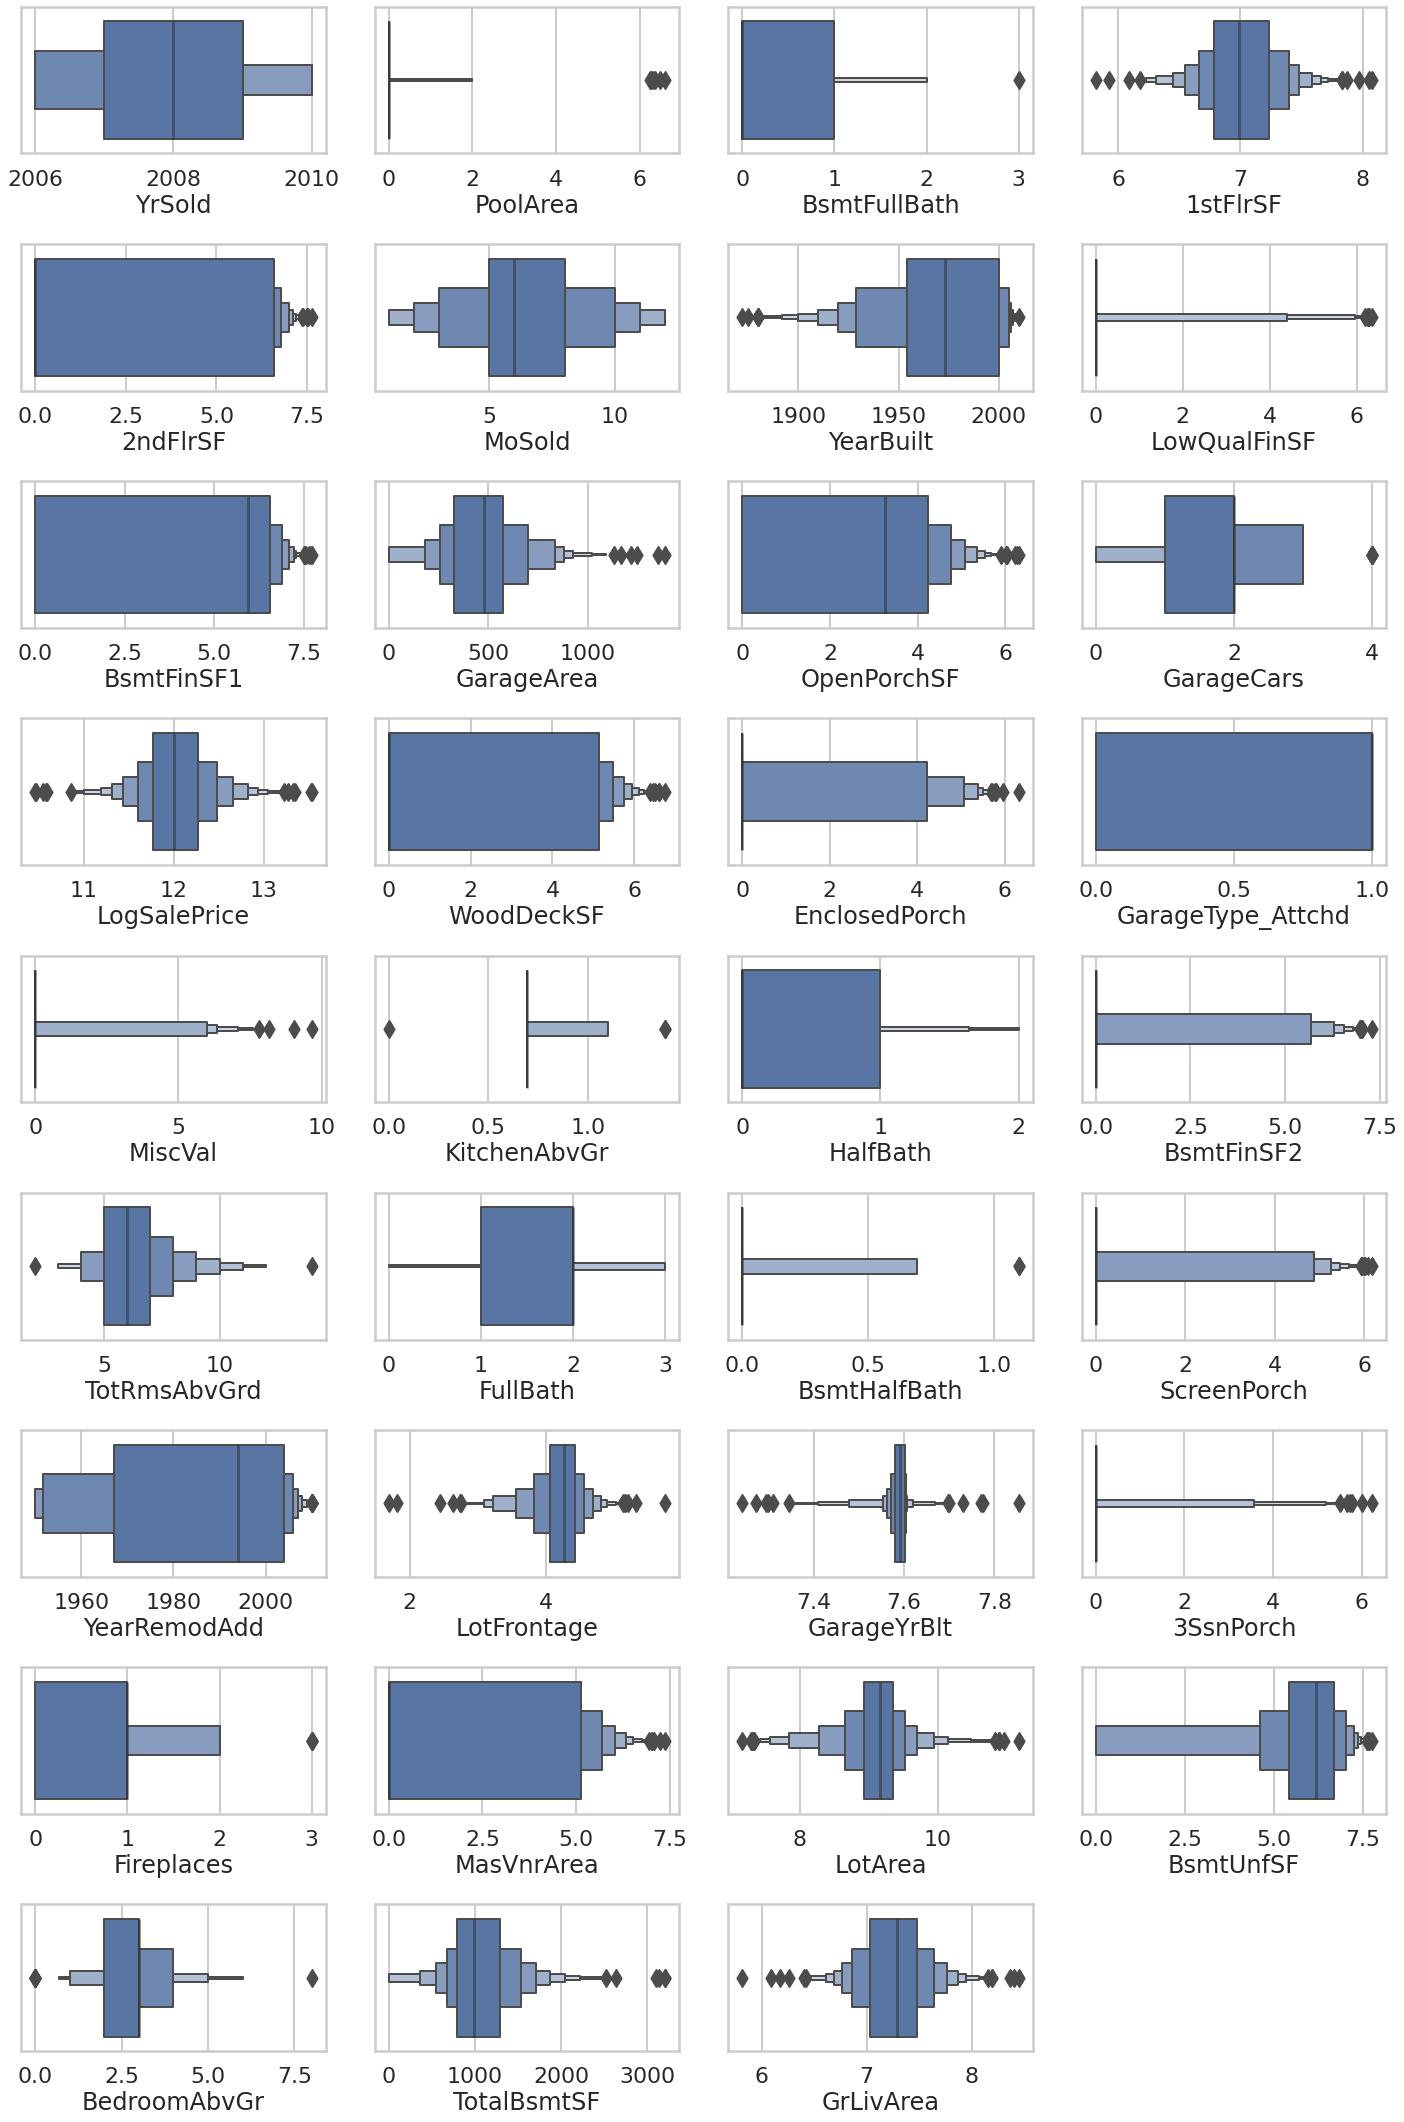

In [60]:
fig, ax = plt.subplots(9, 4, figsize=(20, 30))
ax = ax.flatten()
ax[-1].set_axis_off()
        
for ax,feature in zip(ax,numeric_features):
    ax = sns.boxenplot(ax = ax, x = feature, data = imputed_df)
plt.tight_layout()

#### We note we still have some outliers left in our dataset

--------
# Correlation of Variables
----------

#### After replacing our missing values and treatment of outliers we can check for correlation. Although we are not considered with interpretability of the model, we remove highly correlated features to increase speed and for reducing storage(curse of dimensionality). Also they might incresae harmful bias in our algorithms so we remove to reduce their signal-to-noise ratio.

In [62]:
print(abs(imputed_df.corrwith(imputed_df['LogSalePrice'])).sort_values(ascending = False))

LogSalePrice             1.000000
GrLivArea                0.734230
GarageCars               0.681578
GarageArea               0.656606
TotalBsmtSF              0.640687
1stFlrSF                 0.611505
FullBath                 0.594186
YearBuilt                0.589544
YearRemodAdd             0.568430
TotRmsAbvGrd             0.537947
Fireplaces               0.488315
OpenPorchSF              0.462840
MasVnrArea               0.422285
GarageType_Attchd        0.414391
LotArea                  0.399263
GarageType_Detchd        0.387761
WoodDeckSF               0.344914
SaleCondition_Partial    0.328077
HalfBath                 0.318343
LotFrontage              0.317724
GarageYrBlt              0.299303
BsmtFullBath             0.233185
GarageType_BuiltIn       0.224173
BsmtUnfSF                0.209512
BedroomAbvGr             0.209452
EnclosedPorch            0.206408
BsmtFinSF1               0.205663
2ndFlrSF                 0.182441
SaleCondition_Abnorml    0.160092
KitchenAbvGr  

#### We see the strength of correlation of 'SalePrice'(response varibale) to features(explanatory variables)

# Correlation Plot of Variables - Heatmap

We will plot heatmap of features having correlation with respect to 'Income' in descending order. 

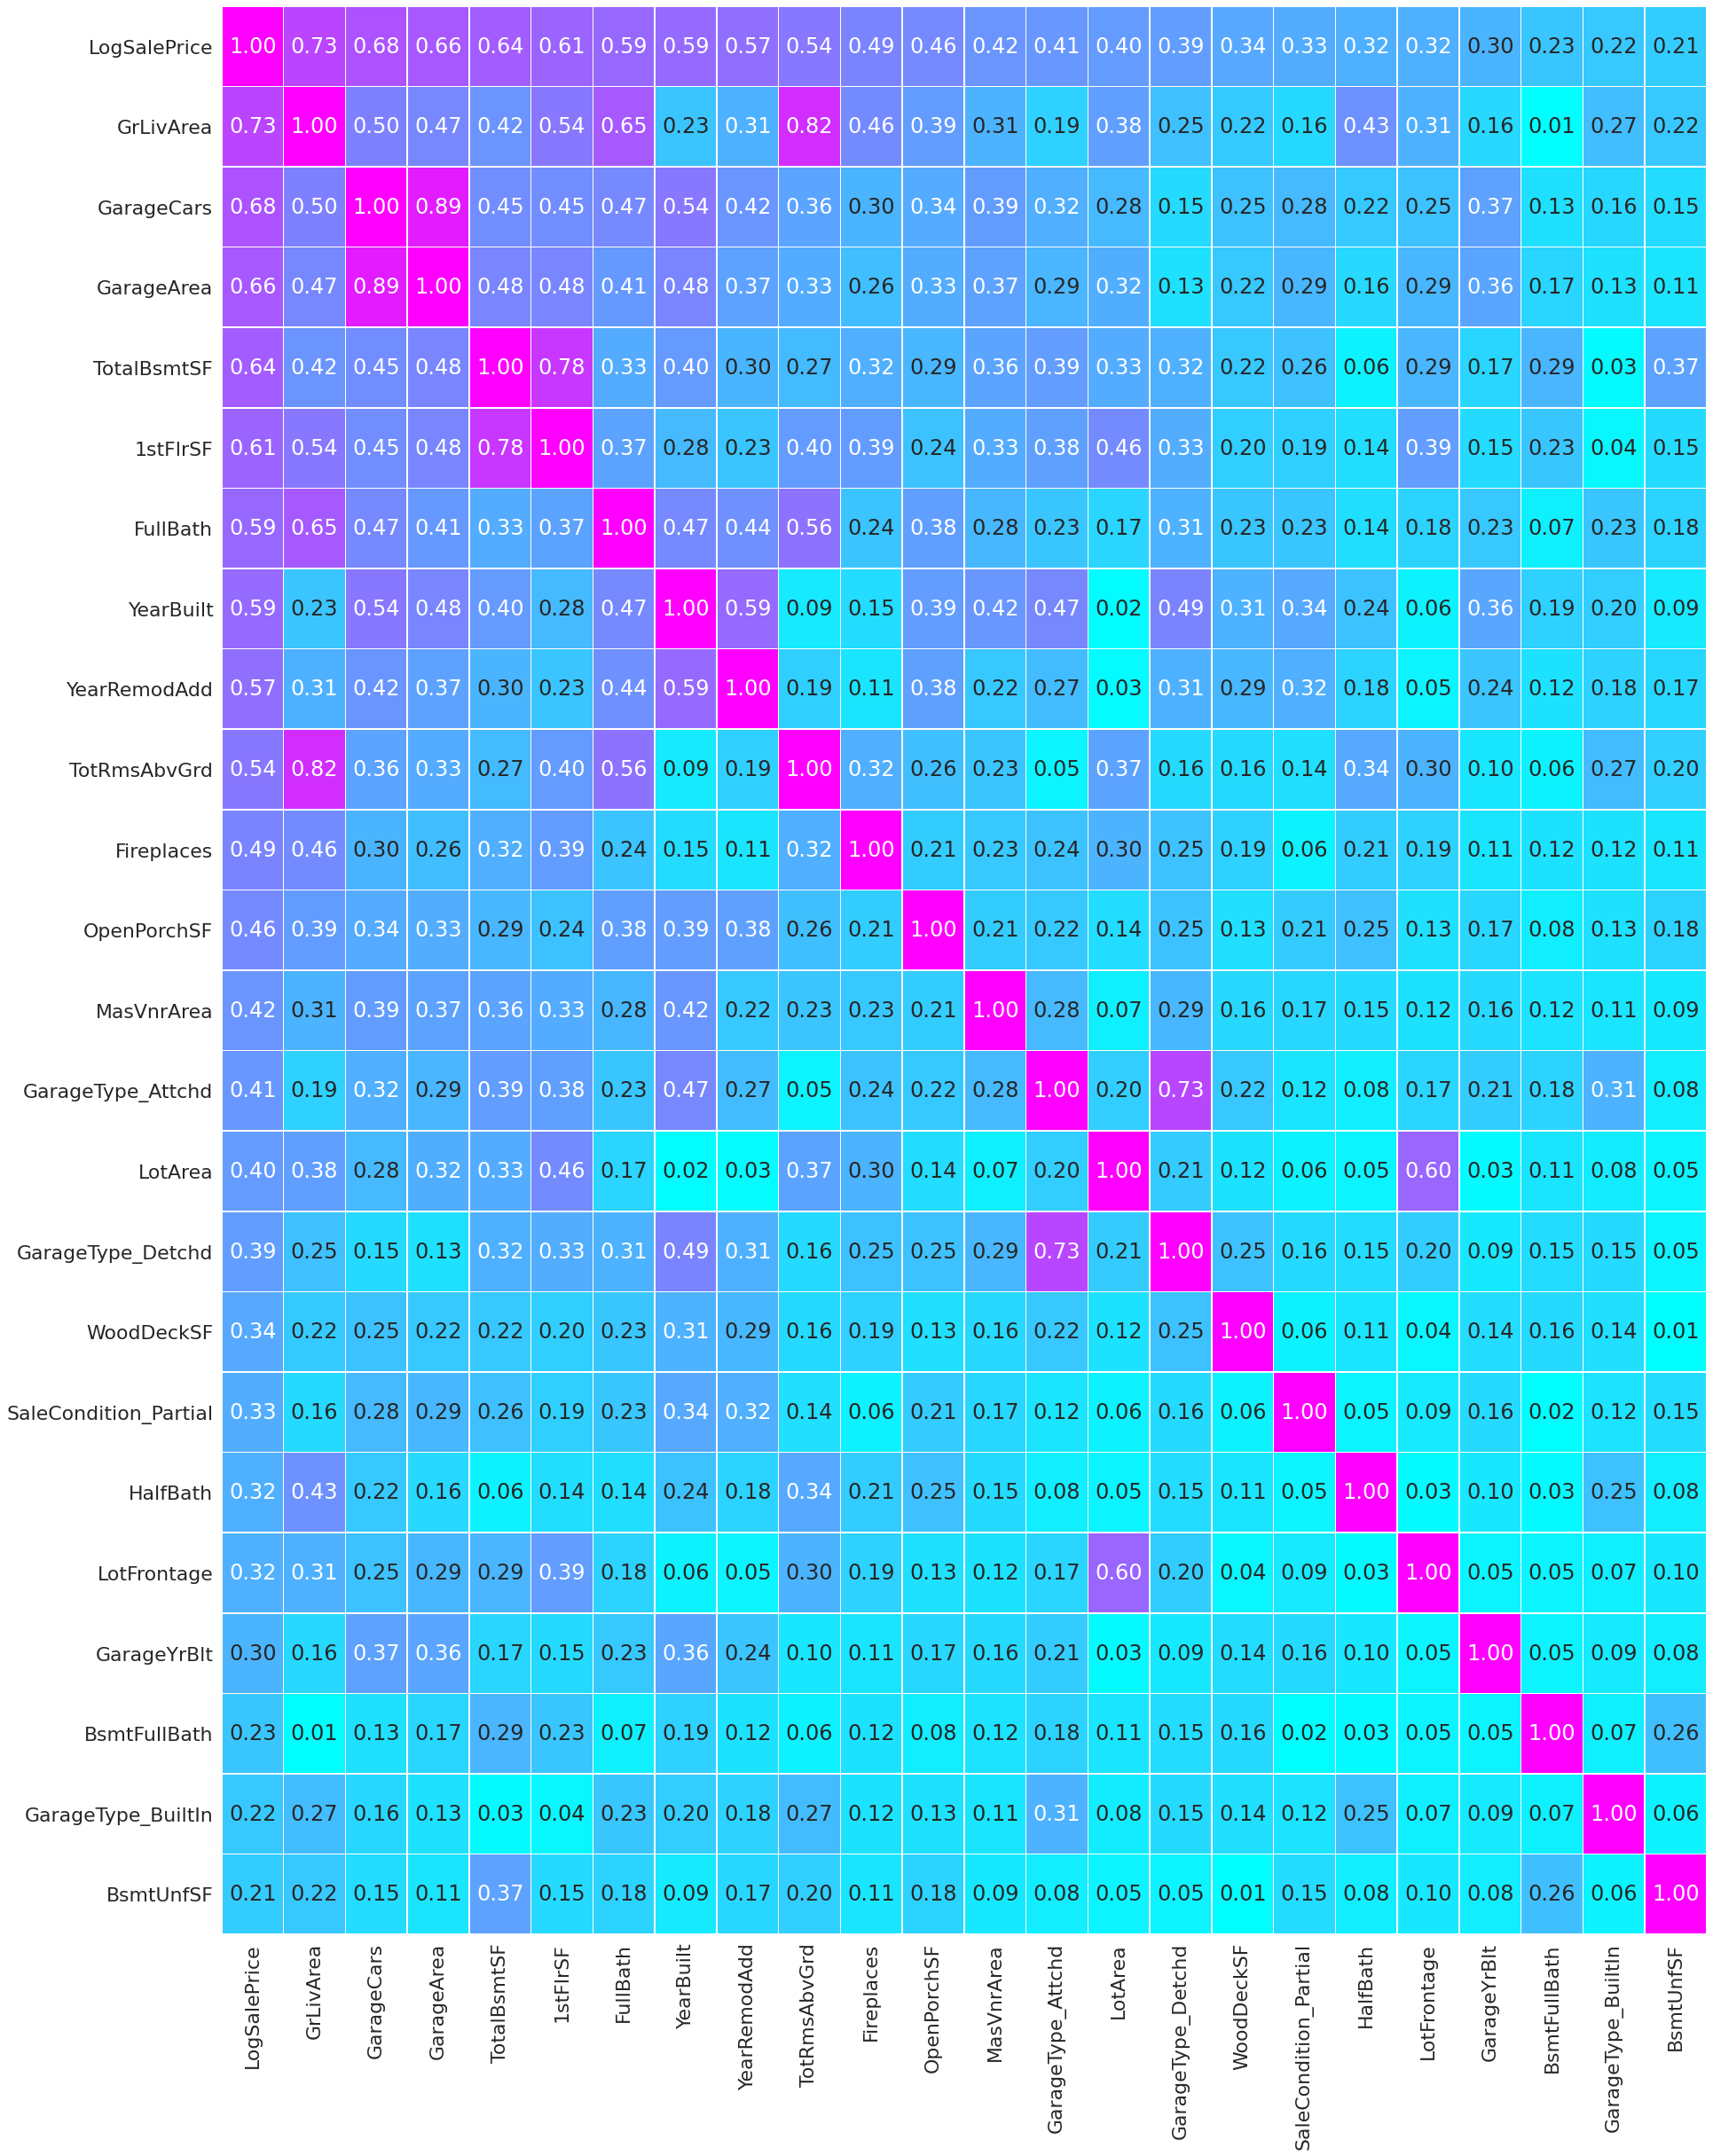

In [63]:
plt.figure(figsize = (30, 40))
sns.set(font_scale=2)

# We use abs to see aximum value of correlation with status (+ or -) 
corr_map = abs(imputed_df.corr())
corr_cols = corr_map.nlargest(24,'LogSalePrice')['LogSalePrice'].index
coff_val = np.corrcoef(imputed_df[corr_cols].values.T)
sns.heatmap(abs(coff_val), annot = True, cbar = False, linewidths=.5, cmap = plt.cm.cool,fmt='.2f', 
            xticklabels = corr_cols.values,yticklabels = corr_cols.values)
plt.show()

#### We observe some features have high correlation with each other. We will set a value of 0.75 correlation and drop those features which have higher correlation amongst other features (predictors) and lower correlation with our outcome  - 'SalePrice' (response variable)

In [64]:
# Creating new list variable dropped_corr_col
dropped_corr_col = []
dropped_corr_col.extend(["TotRmsAbvGrd", "1stFlrSF", "GarageArea"])

imputed_df.drop(["TotRmsAbvGrd", "1stFlrSF", "GarageArea"], axis = 1, inplace = True)
imputed_df.shape

(1455, 43)

#### Creating new list variable, 'dropped_corr_col' which will keep list of correlate variables/columns dropped i.e. after transformation and will be used by test set later.

#### We have dropped 3 highly correlated columns thus reducing dataset to 43 columns from 46

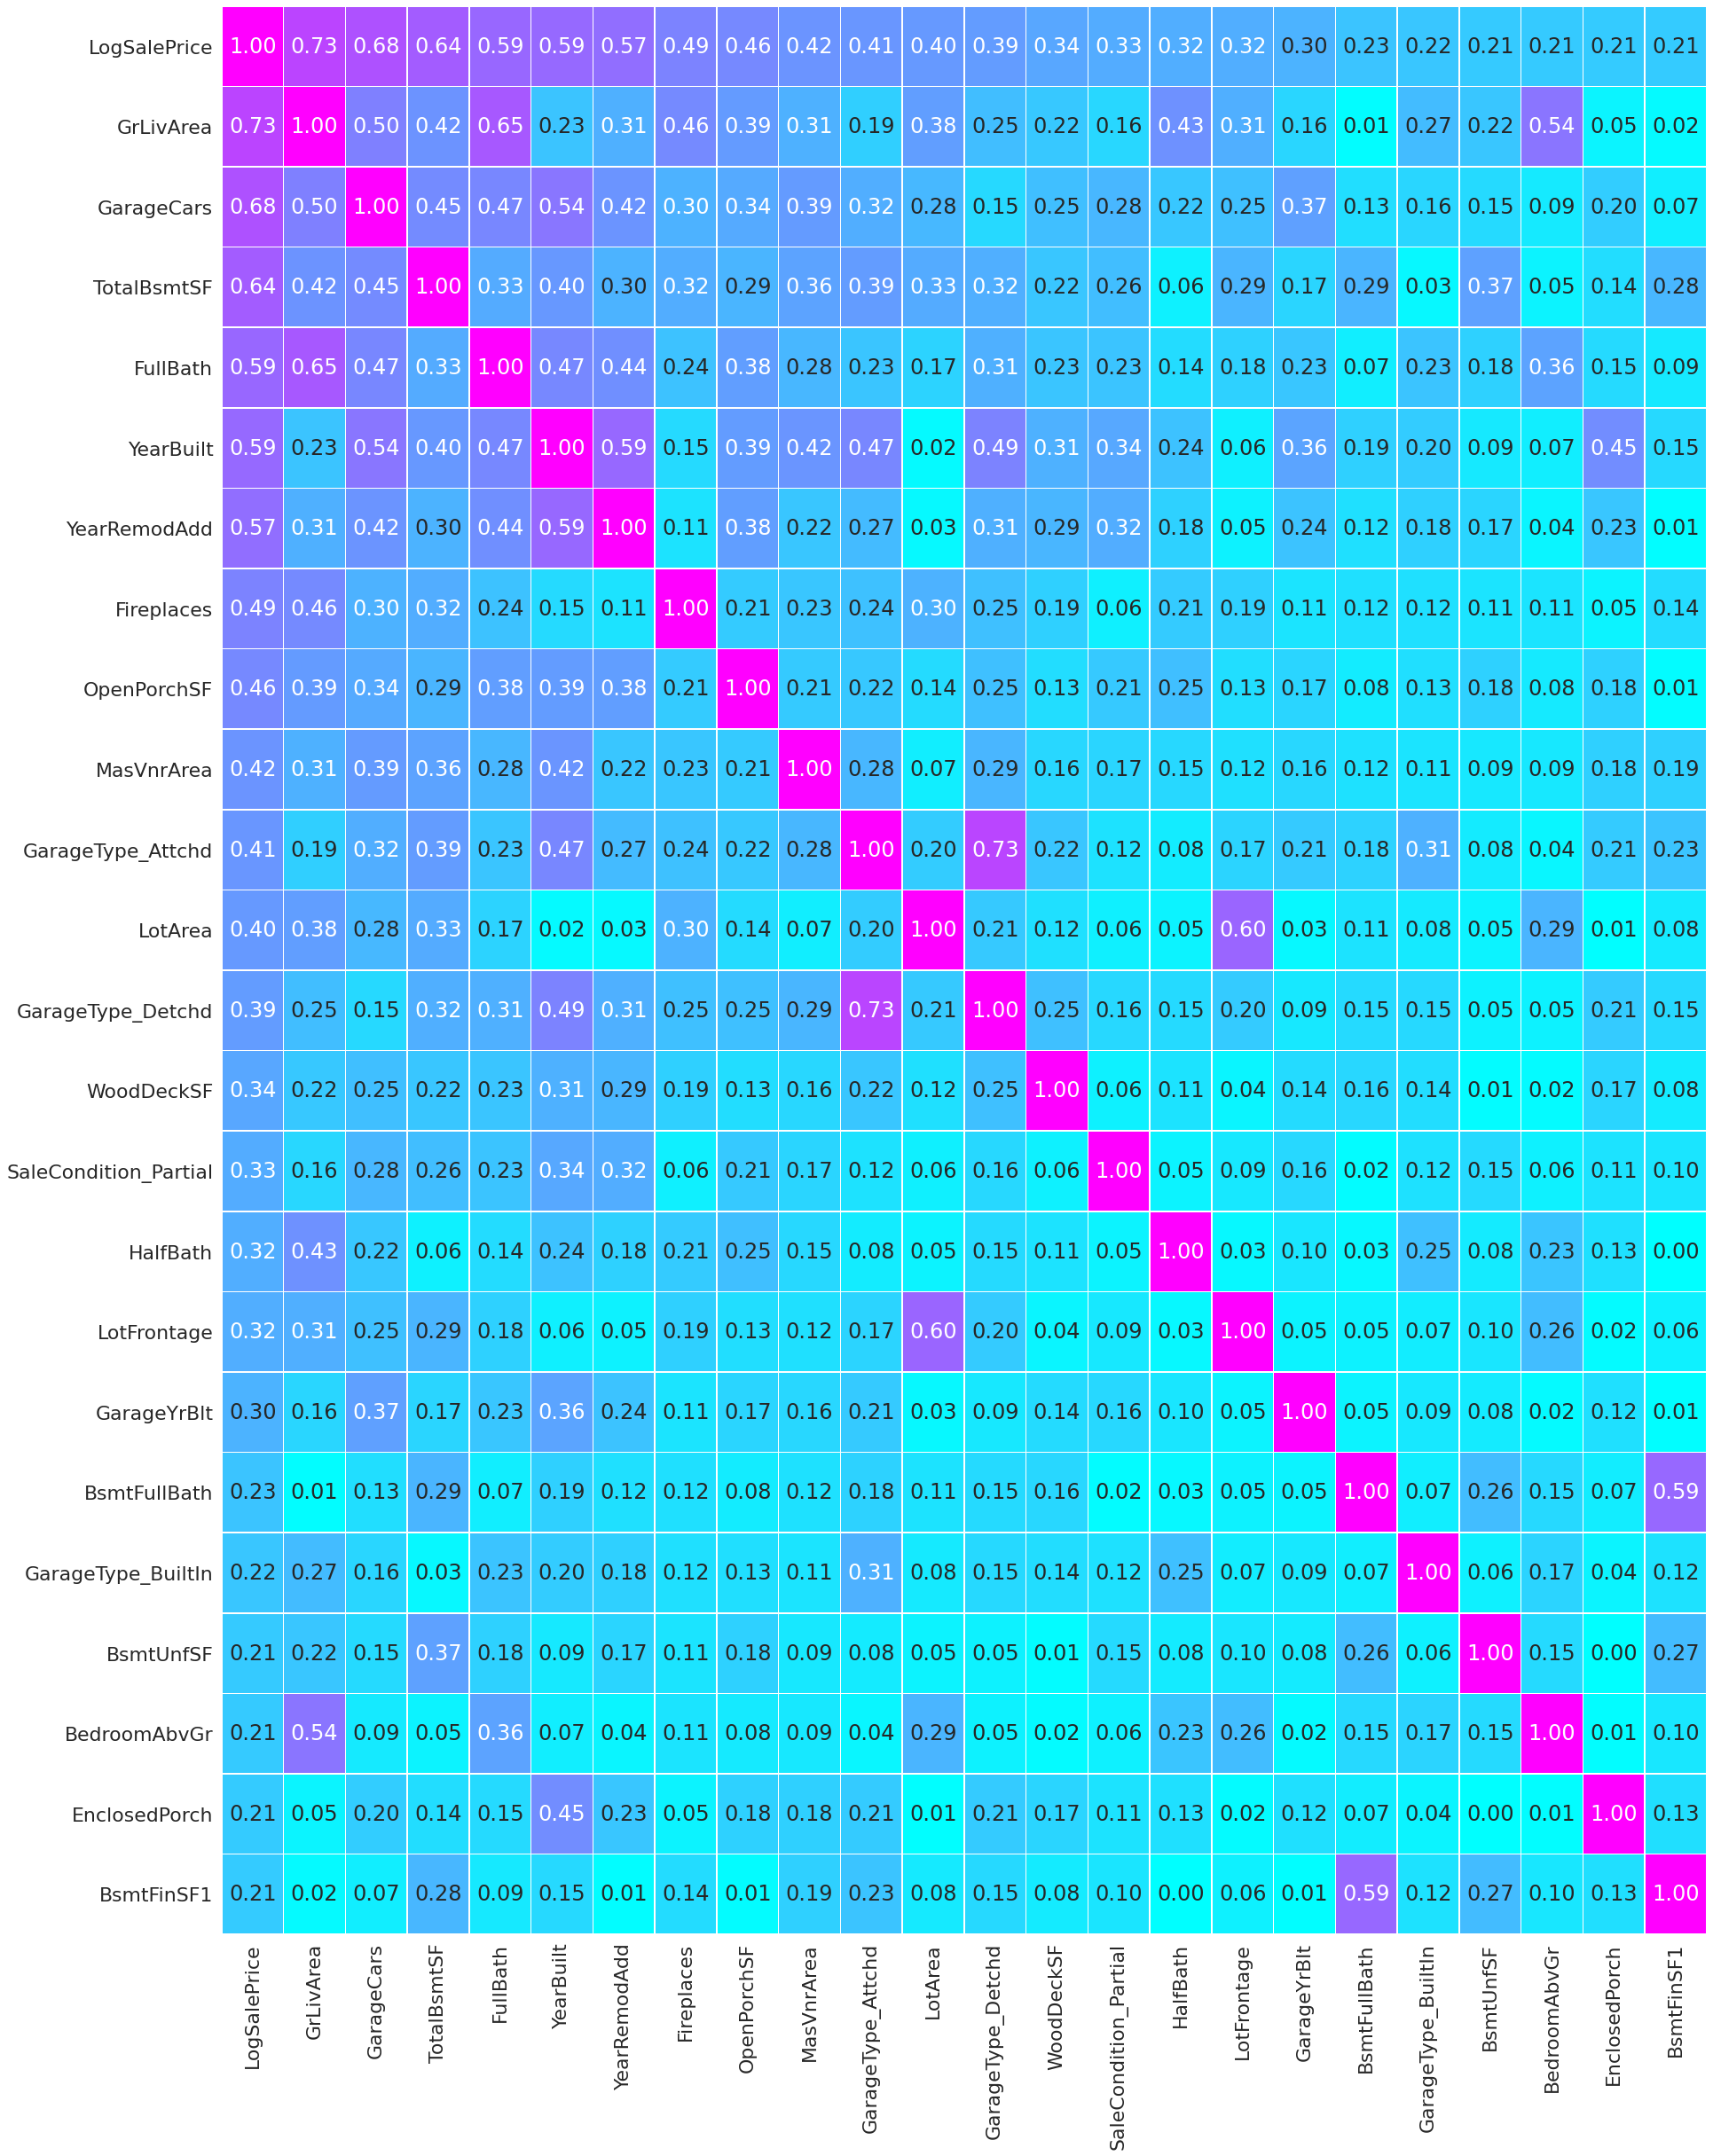

In [65]:
plt.figure(figsize = (30, 40))
sns.set(font_scale=2)

corr_map = abs(imputed_df.corr())
corr_cols = corr_map.nlargest(24,'LogSalePrice')['LogSalePrice'].index
coff_val = np.corrcoef(imputed_df[corr_cols].values.T)
sns.heatmap(abs(coff_val), annot = True, cbar = False, linewidths=.5, cmap = plt.cm.cool,fmt='.2f', 
            xticklabels = corr_cols.values,yticklabels = corr_cols.values)
plt.show()

#### We can see correaltion heatmap after removing features having correlation higher than 0.75 with other explanatory variables and lower correlation to response variable.

#### Once the EDA and feature engineering of training set is completed, we can perform data wrangling, cleaning, feature selection and transformation process on our test set similar to our train set.

In [66]:
df_test = pd.read_csv('KaggleHousePrices_test_SP.csv')
print(df_test.shape)

(1459, 81)


#### Our test dataset has 1459 rows and 81 columns.

In [67]:
df_test.Id.duplicated().sum()

0

#### No duplicated/rows copied twice by mistake found using 'name' feature

In [68]:
df_test.isnull().sum().sum()

7000

#### We observe we have 406 missing values in our test set so we will have to impute missing values.

#### So, now as before we will we perform the following operations on the test set in the same order as we did for training set for the same reasons as mentioned earlier for training set as otherwise it will lead to wrong results when performing transformations (like 'Multiple Imputation', Box-cox etc).

#### The number of columns in test set should match and be the same as training set when performing transformations and all have to be done in the same order and in the same way. Also, we wont do the fit method again on the test set but will use it directly and will use the fit done on training set to avoid data leakage)

### So, first we will remove the same columns(explanatory variables) from test set as those that were removed from training set before transformation.

In [69]:
df_test.drop(dropped_col, axis = 1, inplace = True)

In [70]:
df_test.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [71]:
df_test.shape

(1459, 36)

## Performing One-Hot Encoding on Test Set

In [72]:
enc_df_test = pd.get_dummies(df_test)

In [73]:
enc_df_test.dtypes.value_counts()

float64    27
uint8      12
int64       7
dtype: int64

In [74]:
enc_df_test.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'GarageType_2Types',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object')

# Performing Multiple Imputation

#### When applying multiple imputation we will use the same fit as that of training set(not apply fit again) and directly apply transform on the test set.This operation can be a source of data leakage if not done with care.
#### Also the number of columns of the fit of train set should be same as that of test set to be transformed for multiple imputation to work.

In [75]:
# Checking number of columns when training set performed Multiple Imputation
enc_df.shape

(1455, 46)

#### We confirm we have same number of columns in test set and train set before imputation was done

In [76]:
imputed_data_test = imputer.transform(enc_df_test)
imputed_df_test = pd.DataFrame(imputed_data_test, columns = enc_df_test.columns)

In [77]:
imputed_df_test.isnull().sum().sum()

0

# Log Transformation

#### Performing log transformation of 'SalePrice' and replacing SalePrice variable with LogSalePrice

In [79]:
# Creating new variable 'LogSalePrice' and removing variable 'SalePrice' in our test set

imputed_df_test["LogSalePrice"] = np.log(imputed_df_test["SalePrice"])
imputed_df_test.drop("SalePrice", axis = 1, inplace = True)

# Log1p Transformation

#### Using set operations, creating list variable of same skewed columns on which Log1p transformation was applied for train test and columns available in test set.

In [80]:
# log1p transformation since minimum values is 0 for some of the features

for cols in skew_cols_name:
    imputed_df_test[cols] = np.log1p(imputed_df_test[cols])

In [81]:
imputed_df_test.drop(dropped_corr_col,axis = 1, inplace = True)

#### After log1p transformation and removing correlated columns from our test set, our data is ready for the next step in data analysis i.e. Modelling.

In [82]:
## Saving after data wrangling, EDA and preprocessing of data.

outputfile_1 = 'linear_regression_train.csv'
outputfile_2 = 'linear_regression_test.csv'
imputed_df.to_csv(outputfile_1, index=False)
imputed_df_test.to_csv(outputfile_2, index=False)

# Suggestion for Next Steps

* Data preprocessing. Try different types of data transfoms to expose the data structure better, so we may be able to improve model accuracy
- Identification of categorical variables correctly and also between nominal and ordinal variables before encoding them.
- Binning of other categorical columns using specific hypothesis tests as appropriate (this can help improve accuracy for decision tree algorithms).    
- Checking different limits for collinearty when removing features
- Use of dimensionality reducing techniques(e.g. - PCA, Isolation Forest,) to detect and remove collinear features (This will take away our ability to make inference from the data but can help in increasing prediction score) 